In [49]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [50]:
train_data = pd.read_csv("train.csv")

In [51]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
female_data = train_data.loc[train_data["Sex"] == "female"]["Survived"]
female_survived_rate = sum(female_data) / len(female_data) 

print("% of women who survived:", female_survived_rate * 100)

% of women who survived: 74.20382165605095


In [53]:
male_data = train_data.loc[train_data["Sex"] == "male"]["Survived"]
male_survived_rate = sum(male_data) / len(male_data)

print("% of men who survived:", male_survived_rate * 100)

% of men who survived: 18.890814558058924


In [54]:
def visualisation(df, feature_col, survived_col_name="Survived"):

    index_value = df[feature_col].unique().tolist()

    survived = []
    total = []

    for value in index_value:
        col_data = df.loc[df[feature_col] == value][survived_col_name]

        survived.append(sum(col_data))
        total.append(len(col_data))

    new_df = pd.DataFrame({"survived": survived, "total": total}, index=index_value)
    
    new_df.plot.bar(rot=0)
    
    plt.title("Survived and total number of passengers by " + feature_col)
    plt.show()

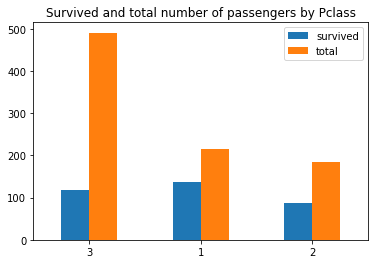

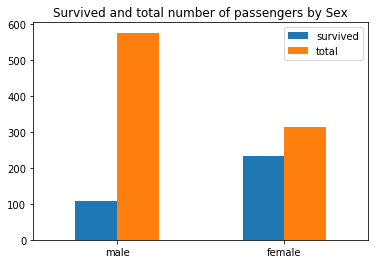

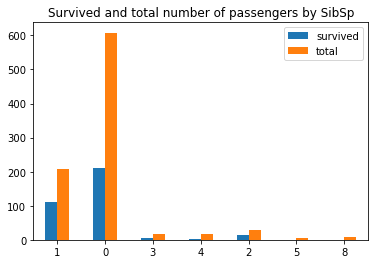

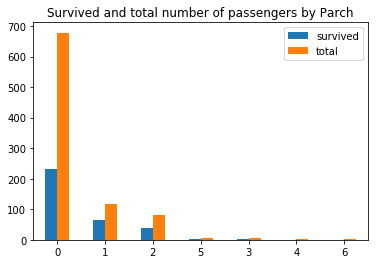

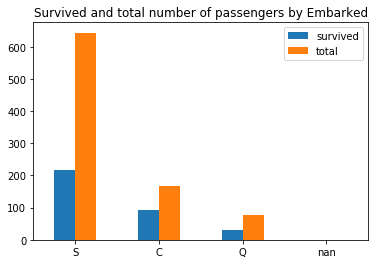

In [55]:
features_vis = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for feature in features_vis:
    visualisation(train_data, feature)

In [56]:
test_data = pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [59]:
y = train_data["Survived"]

features = features_vis

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

predict_data = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
predict_data.to_csv('predict.csv', index=False)
print("Your file was successfully saved")
predict_data

Your file was successfully saved


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
